In [3]:
import os
from scipy import misc
from matplotlib import pyplot as plt
import numpy as np
import numpy.ma as ma
%matplotlib inline

0
mouse_data/mask/1487573251.mask.0.png
1
mouse_data/mask/1487573251.mask.1.png
2
mouse_data/mask/1487573251.mask.2.png
3
mouse_data/mask/1487573251.mask.3.png
4
mouse_data/mask/1487573251.mask.4.png
5
mouse_data/mask/1487573251.mask.5.png
6
mouse_data/mask/1487573251.mask.6.png
7
mouse_data/mask/1487573251.mask.7.png
8
mouse_data/mask/1487573251.mask.8.png
0
mouse_data/mask/1487573131.mask.0.png
1
mouse_data/mask/1487573131.mask.1.png
2
mouse_data/mask/1487573131.mask.2.png
3
mouse_data/mask/1487573131.mask.3.png
4
mouse_data/mask/1487573131.mask.4.png
5
mouse_data/mask/1487573131.mask.5.png
6
mouse_data/mask/1487573131.mask.6.png
7
mouse_data/mask/1487573131.mask.7.png
8
mouse_data/mask/1487573131.mask.8.png
0
mouse_data/mask/1487573226.mask.0.png
1
mouse_data/mask/1487573226.mask.1.png
2
mouse_data/mask/1487573226.mask.2.png
3
mouse_data/mask/1487573226.mask.3.png
4
mouse_data/mask/1487573226.mask.4.png
5
mouse_data/mask/1487573226.mask.5.png
6
mouse_data/mask/1487573226.mask.6.png


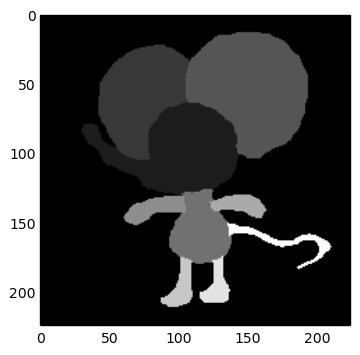

In [4]:
data_dir = 'mouse_data/'
# label_map = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for (dirpath, dirnames, filenames) in os.walk(data_dir + 'images'):
    for filename in filenames:
        img = misc.imread(data_dir + 'images/' + filename, mode='L')
        label_data = np.ones(img.shape, dtype='byte')
        for label_idx in range(9):
            print(label_idx)
            label = label_idx + 2
            mask_name = data_dir + 'mask/' + filename.replace('.png', '.mask.' + str(label_idx) + '.png')
            print(mask_name)
            cur_label_img = misc.imread(mask_name, mode='L')
            cur_label_img = np.minimum(cur_label_img, np.ones(cur_label_img.shape))
#             plt.imshow(cur_label_img, cmap='gray')
            label_data_mx = ma.masked_array(label_data, mask=cur_label_img)
            ma.set_fill_value(label_data_mx, label)
            label_data = label_data_mx.filled()
        plt.imshow(label_data, cmap='gray')
        # save labeled image
        misc.imsave(data_dir + 'label_images/' + filename, label_data)
        # save to dat file
        label_filename = data_dir + 'labels/' + filename.replace('.png', '.dat')
        label_file = open(label_filename, "wb")
        byte_data = bytearray(label_data)
        label_file.write(byte_data)
        label_file.close()